## Read VOC format XML

In [1]:
import os
import xml.etree.ElementTree as ET
import pandas as pd

def process_xml_file(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()

    filename = root.find('filename').text
    size = root.find('size')
    width = int(size.find('width').text)
    height = int(size.find('height').text)
    depth = int(size.find('depth').text)

    data = []
    for obj in root.findall('object'):
        name = obj.find('name').text
        xmin = int(obj.find('bndbox/xmin').text)
        ymin = int(obj.find('bndbox/ymin').text)
        xmax = int(obj.find('bndbox/xmax').text)
        ymax = int(obj.find('bndbox/ymax').text)
        data.append({
            'filename': filename,
            'width': width,
            'height': height,
            'depth': depth,
            'name': name,
            'xmin': xmin,
            'ymin': ymin,
            'xmax': xmax,
            'ymax': ymax
        })

    return data

# Specify the folder path containing the XML files
folder_path = 'pascal_voc_annotations'

# Create an empty list to store the processed data
data = []

# Iterate over the XML files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.xml'):
        file_path = os.path.join(folder_path, filename)
        xml_data = process_xml_file(file_path)
        data.extend(xml_data)

# Create the DataFrame
df = pd.DataFrame(data)

df

,filename,width,height,depth,name,xmin,ymin,xmax,ymax
0,0000c64e1253d68f.jpg,1024,683,3,car_(automobile),0,216,528,470
1,0000c64e1253d68f.jpg,1024,683,3,car_(automobile),769,226,1024,451
2,0000c64e1253d68f.jpg,1024,683,3,car_(automobile),491,157,927,336
3,0000c64e1253d68f.jpg,1024,683,3,car_(automobile),16,186,279,318
4,0000c64e1253d68f.jpg,1024,683,3,car_(automobile),123,0,243,31
...,...,...,...,...,...,...,...,...,...
104527,ffef8fa6031038f9.jpg,1024,768,3,car_(automobile),768,339,779,345
104528,ffef8fa6031038f9.jpg,1024,768,3,car_(automobile),736,339,753,346
104529,ffef8fa6031038f9.jpg,1024,768,3,car_(automobile),919,333,935,340
104530,fff419b5ba84d9b5.jpg,1024,768,3,car_(automobile),22,257,131,284


## Plot

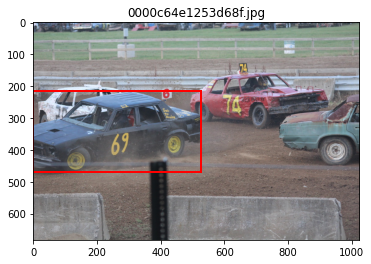

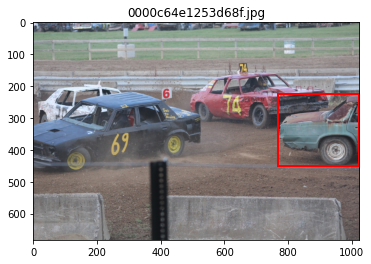

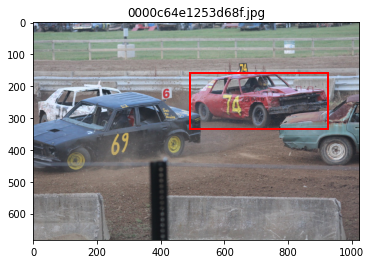

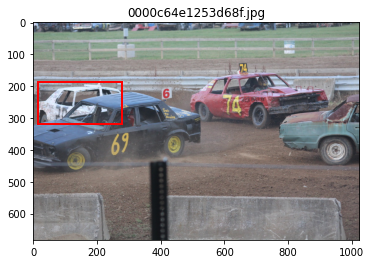

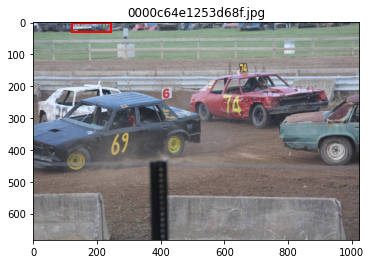

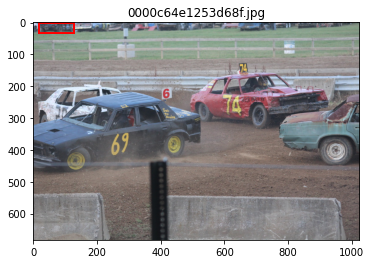

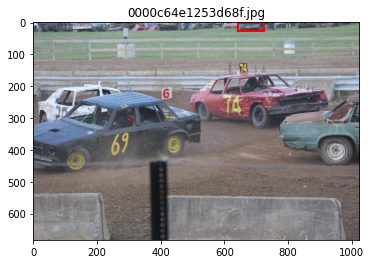

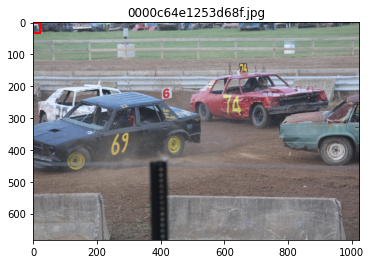

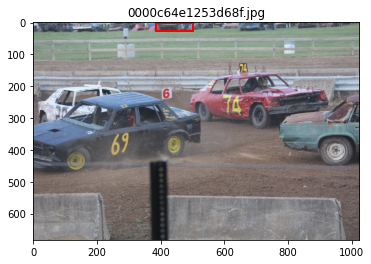

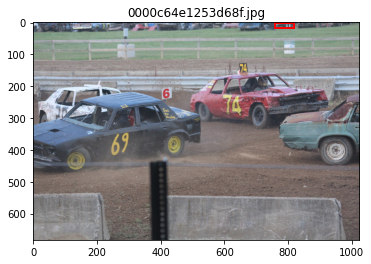

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image


image_folder_path = '/workspace/yolo_v8_training/oiv7_full/test/'


for _, row in df.head(10).iterrows():
    filename = row['filename']
    xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
    
    # Load the corresponding image
    
    image_path = os.path.join(image_folder_path, filename)
    image = Image.open(image_path)
    
    # Create a figure and axes
    fig, ax = plt.subplots()
    
    # Display the image
    ax.imshow(image)
    
    # Create a rectangle patch for the bounding box
    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')
    
    # Add the rectangle patch to the axes
    ax.add_patch(rect)
    
    # Set the title and display the plot
    ax.set_title(filename)
    plt.show()

## Convert to fastdup format

In [3]:
df

,filename,width,height,depth,name,xmin,ymin,xmax,ymax
0,0000c64e1253d68f.jpg,1024,683,3,car_(automobile),0,216,528,470
1,0000c64e1253d68f.jpg,1024,683,3,car_(automobile),769,226,1024,451
2,0000c64e1253d68f.jpg,1024,683,3,car_(automobile),491,157,927,336
3,0000c64e1253d68f.jpg,1024,683,3,car_(automobile),16,186,279,318
4,0000c64e1253d68f.jpg,1024,683,3,car_(automobile),123,0,243,31
...,...,...,...,...,...,...,...,...,...
104527,ffef8fa6031038f9.jpg,1024,768,3,car_(automobile),768,339,779,345
104528,ffef8fa6031038f9.jpg,1024,768,3,car_(automobile),736,339,753,346
104529,ffef8fa6031038f9.jpg,1024,768,3,car_(automobile),919,333,935,340
104530,fff419b5ba84d9b5.jpg,1024,768,3,car_(automobile),22,257,131,284


In [4]:
df_annots = df[['filename', 'name', 'xmin', 'ymin', 'xmax', 'ymax']]
df_annots.rename(columns={'name':'label'}, inplace=True)
df_annots

<ipython-input-4-814045563ed2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annots.rename(columns={'name':'label'}, inplace=True)


,filename,label,xmin,ymin,xmax,ymax
0,0000c64e1253d68f.jpg,car_(automobile),0,216,528,470
1,0000c64e1253d68f.jpg,car_(automobile),769,226,1024,451
2,0000c64e1253d68f.jpg,car_(automobile),491,157,927,336
3,0000c64e1253d68f.jpg,car_(automobile),16,186,279,318
4,0000c64e1253d68f.jpg,car_(automobile),123,0,243,31
...,...,...,...,...,...,...
104527,ffef8fa6031038f9.jpg,car_(automobile),768,339,779,345
104528,ffef8fa6031038f9.jpg,car_(automobile),736,339,753,346
104529,ffef8fa6031038f9.jpg,car_(automobile),919,333,935,340
104530,fff419b5ba84d9b5.jpg,car_(automobile),22,257,131,284


In [5]:
df_annots['filename'] = image_folder_path + df_annots['filename']
df_annots

<ipython-input-5-950fdc64c5bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annots['filename'] = image_folder_path + df_annots['filename']


,filename,label,xmin,ymin,xmax,ymax
0,/workspace/yolo_v8_training/oiv7_full/test/000...,car_(automobile),0,216,528,470
1,/workspace/yolo_v8_training/oiv7_full/test/000...,car_(automobile),769,226,1024,451
2,/workspace/yolo_v8_training/oiv7_full/test/000...,car_(automobile),491,157,927,336
3,/workspace/yolo_v8_training/oiv7_full/test/000...,car_(automobile),16,186,279,318
4,/workspace/yolo_v8_training/oiv7_full/test/000...,car_(automobile),123,0,243,31
...,...,...,...,...,...,...
104527,/workspace/yolo_v8_training/oiv7_full/test/ffe...,car_(automobile),768,339,779,345
104528,/workspace/yolo_v8_training/oiv7_full/test/ffe...,car_(automobile),736,339,753,346
104529,/workspace/yolo_v8_training/oiv7_full/test/ffe...,car_(automobile),919,333,935,340
104530,/workspace/yolo_v8_training/oiv7_full/test/fff...,car_(automobile),22,257,131,284


In [7]:
# Convert bounding boxes
df_annots['col_x'] = (df_annots['xmin'] + df_annots['xmax']) / 2
df_annots['row_y'] = (df_annots['ymin'] + df_annots['ymax']) / 2
df_annots['width'] = df_annots['xmax'] - df_annots['xmin']
df_annots['height'] = df_annots['ymax'] - df_annots['ymin']

df_annots = df_annots[['filename', 'label', 'col_x', 'row_y', 'width', 'height']]

df_annots

,filename,label,col_x,row_y,width,height
0,/workspace/yolo_v8_training/oiv7_full/test/000...,car_(automobile),264.0,343.0,528,254
1,/workspace/yolo_v8_training/oiv7_full/test/000...,car_(automobile),896.5,338.5,255,225
2,/workspace/yolo_v8_training/oiv7_full/test/000...,car_(automobile),709.0,246.5,436,179
3,/workspace/yolo_v8_training/oiv7_full/test/000...,car_(automobile),147.5,252.0,263,132
4,/workspace/yolo_v8_training/oiv7_full/test/000...,car_(automobile),183.0,15.5,120,31
...,...,...,...,...,...,...
104527,/workspace/yolo_v8_training/oiv7_full/test/ffe...,car_(automobile),773.5,342.0,11,6
104528,/workspace/yolo_v8_training/oiv7_full/test/ffe...,car_(automobile),744.5,342.5,17,7
104529,/workspace/yolo_v8_training/oiv7_full/test/ffe...,car_(automobile),927.0,336.5,16,7
104530,/workspace/yolo_v8_training/oiv7_full/test/fff...,car_(automobile),76.5,270.5,109,27


In [8]:
grouped_df = df_annots.groupby('filename')
agg_df = grouped_df.agg(lambda x: list(x))
agg_df = agg_df.reset_index()

In [9]:
agg_df


,filename,label,col_x,row_y,width,height
0,/workspace/yolo_v8_training/oiv7_full/test/000...,"[car_(automobile), car_(automobile), car_(auto...","[264.0, 896.5, 709.0, 147.5, 183.0, 72.5, 684....","[343.0, 338.5, 246.5, 252.0, 15.5, 16.0, 14.0,...","[528, 255, 436, 263, 120, 111, 84, 20, 117, 62...","[254, 225, 179, 132, 31, 32, 28, 32, 26, 18, 1..."
1,/workspace/yolo_v8_training/oiv7_full/test/000...,"[car_(automobile), car_(automobile), car_(auto...","[157.5, 409.0, 409.0]","[702.5, 626.0, 608.5]","[147, 80, 80]","[105, 70, 35]"
2,/workspace/yolo_v8_training/oiv7_full/test/000...,"[car_(automobile), car_(automobile)]","[776.5, 905.5]","[434.5, 297.0]","[495, 237]","[359, 192]"
3,/workspace/yolo_v8_training/oiv7_full/test/000...,"[car_(automobile), car_(automobile)]","[666.0, 989.0]","[638.0, 653.0]","[22, 24]","[22, 12]"
4,/workspace/yolo_v8_training/oiv7_full/test/001...,"[car_(automobile), car_(automobile), car_(auto...","[491.5, 130.0, 921.5, 958.5, 25.0, 556.5, 998....","[362.0, 328.0, 196.0, 366.0, 192.0, 183.5, 188...","[527, 260, 109, 131, 50, 131, 51, 18, 256, 131]","[342, 246, 36, 360, 26, 21, 15, 7, 181, 42]"
...,...,...,...,...,...,...
17369,/workspace/yolo_v8_training/oiv7_full/test/ffe...,"[car_(automobile), car_(automobile)]","[982.0, 954.0]","[300.5, 297.5]","[32, 22]","[11, 9]"
17370,/workspace/yolo_v8_training/oiv7_full/test/ffe...,[car_(automobile)],[513.5],[353.0],[1019],[706]
17371,/workspace/yolo_v8_training/oiv7_full/test/ffe...,"[car_(automobile), car_(automobile), car_(auto...","[512.0, 989.5, 831.5, 885.5]","[340.5, 73.0, 32.5, 89.5]","[1024, 69, 165, 277]","[681, 94, 63, 175]"
17372,/workspace/yolo_v8_training/oiv7_full/test/ffe...,"[car_(automobile), car_(automobile), car_(auto...","[414.0, 111.0, 200.5, 377.0, 813.5, 955.5, 792...","[452.0, 375.0, 281.5, 325.0, 342.0, 337.0, 341...","[700, 222, 279, 100, 23, 15, 22, 21, 20, 22, 2...","[348, 210, 177, 74, 8, 6, 8, 7, 8, 8, 8, 8, 8,..."


## Plot Bounding Boxes to verify conversion

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

def generate_colormap(labels, hue_start=0.1, hue_end=0.9, saturation=0.9, value=0.8):
    """
    Generate a colormap for a set of unique labels while avoiding bright colors.

    Parameters:
        labels (iterable): An iterable object containing labels.
        hue_start (float): The start value of the hue range in HSV space.
        hue_end (float): The end value of the hue range in HSV space.
        saturation (float): Saturation level to set for the colors.
        value (float): Brightness level to set for the colors.

    Returns:
        dict: A dictionary mapping labels to colors in RGB format.
    """
    try:
        from matplotlib.colors import hsv_to_rgb
    except:
        print("matplotlib dependency is needed please install using pip3 install matplotlib")
        raise

    unique_labels = set(labels)
    n_labels = len(unique_labels)

    # Define ranges for Hue
    hue_range = np.linspace(hue_start, hue_end, n_labels)

    # Create colormap in HSV and then convert to RGB
    colormap_hsv = np.zeros((n_labels, 3))
    colormap_hsv[:, 0] = hue_range
    colormap_hsv[:, 1] = saturation
    colormap_hsv[:, 2] = value
    colormap = [hsv_to_rgb(color) for color in colormap_hsv]

    # Create a label to color mapping
    label_to_color = {label: colormap[i] for i, label in enumerate(unique_labels)}

    return label_to_color
    
def annotate_image(ax, img, annotations):
    ax.imshow(img)
    label_to_color = generate_colormap(annotations["labels"])

    for label, box in zip(annotations["labels"], annotations["boxes"]):
        cx, cy, w, h = box
        color = label_to_color.get(label, (0, 0, 0, 1))  # Fallback color is black

        x = cx - w / 2
        y = cy - h / 2

        rect = patches.Rectangle((x, y), w, h, linewidth=1.5, edgecolor=color, facecolor="none")
        ax.add_patch(rect)
        ax.text(x, y, f"{label}", fontsize=10, color="white",
                bbox=dict(facecolor=color, edgecolor=color, boxstyle="round,pad=0.5"))

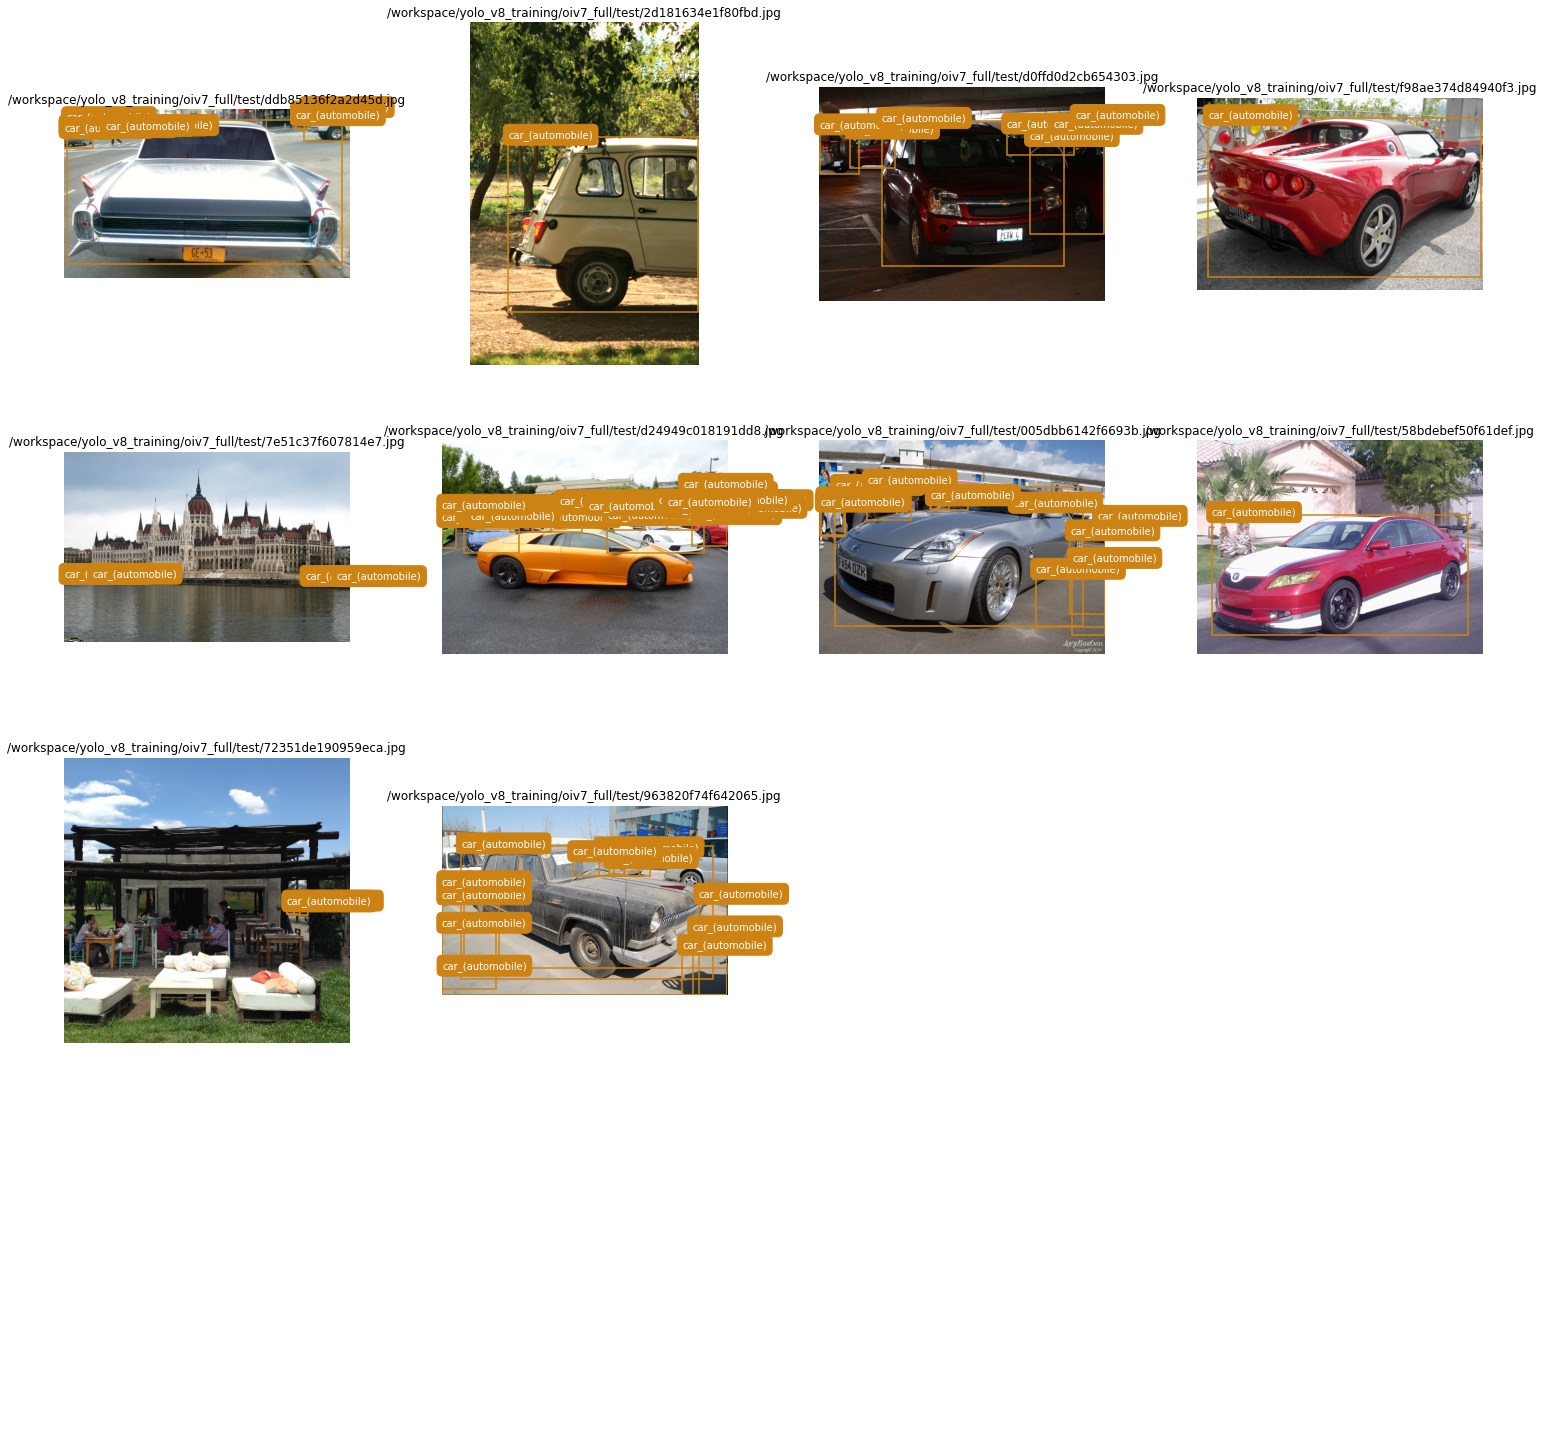

In [11]:
NUM_IMAGES = 10
sampled_df = agg_df.sample(NUM_IMAGES) 

# Calculate grid size
n_images = len(sampled_df)
grid_size = int(n_images**0.5) + 1  # Simple way to determine grid size

# Create figure and axes
fig, axes = plt.subplots(grid_size, grid_size, figsize=(20, 20))

axes = axes.flatten()  # Flatten to easily iterate over

for ax, (index, row) in zip(axes, sampled_df.iterrows()):
    filename = row['filename']
    img = plt.imread(filename)  # Assuming plt is imported from matplotlib
    annotations = {
        'labels': row['label'],
        # 'scores': row['score'],
        # 'outlier_distance': row['outlier_distance'],
        'boxes': list(zip(row['col_x'], row['row_y'], row['width'], row['height']))
    }
    
    annotate_image(ax, img, annotations)
    ax.set_title(filename)
    ax.axis('off')  # Hide axis

# Hide any unused subplots
for ax in axes[len(sampled_df):]:
    ax.axis('off')
    
plt.tight_layout()
plt.show()